# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Dependencies and Setup
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
import matplotlib.pyplot as plt

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
import requests
import pandas as pd
import time

# API base URL and API key
url = "https://api.openweathermap.org/data/2.5/weather"
api_key = "3e48182cb1e6e83c1218b43f18c1d31c"

# List of cities
cities = ["Chicago", "Dallas", "São Paulo", "Buenos Aires"]

# Initialize an empty list for storing weather data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Initialize counters
record_count = 1
set_count = 1

# Loop through cities to fetch data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"
    
    # Log the progress
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Increment record count
    record_count += 1

    # Make the API request
    try:
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an error for HTTP issues
        city_weather = response.json()

        # Parse required fields
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

# Completion message
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Save results to a CSV file
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv("city_weather_data.csv", index=False)
print("Weather data saved to city_weather_data.csv")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Chicago
Processing Record 2 of Set 1 | Dallas
Processing Record 3 of Set 1 | São Paulo
Processing Record 4 of Set 1 | Buenos Aires
-----------------------------
Data Retrieval Complete
-----------------------------
Weather data saved to city_weather_data.csv


In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          4
Lat           4
Lng           4
Max Temp      4
Humidity      4
Cloudiness    4
Wind Speed    4
Country       4
Date          4
dtype: int64


In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicago,41.8500,-87.6500,10.58,46,100,3.60,US,1733789701
1,Dallas,32.7668,-96.7836,18.10,65,20,4.63,US,1733789476
2,São Paulo,-23.5475,-46.6361,23.38,85,100,5.81,BR,1733789528
3,Buenos Aires,-34.6132,-58.3772,21.64,50,49,6.26,AR,1733789684


In [21]:
# Export the City_Data into a CSV
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
print("City weather data successfully saved to 'output_data/cities.csv'")

City weather data successfully saved to 'output_data/cities.csv'


In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Chicago,41.8500,-87.6500,10.58,46,100,3.60,US,1733789701
1,Dallas,32.7668,-96.7836,18.10,65,20,4.63,US,1733789476
2,São Paulo,-23.5475,-46.6361,23.38,85,100,5.81,BR,1733789528
3,Buenos Aires,-34.6132,-58.3772,21.64,50,49,6.26,AR,1733789684


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

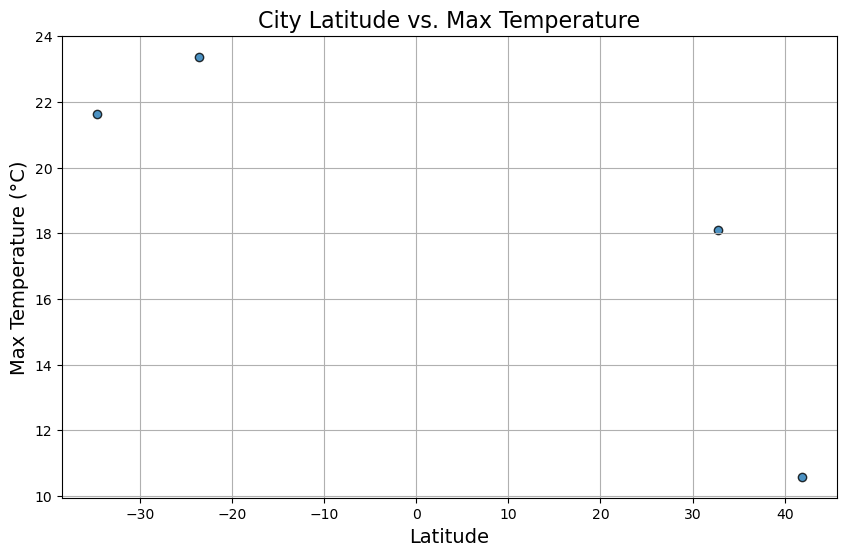

In [23]:
# Load the data
weather_data = pd.read_csv('city_weather_data.csv')

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (°C)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig('latitude_vs_temperature.png')  # Replace with your desired save path

# Show plot
plt.show()

#### Latitude Vs. Humidity

Scatter plot saved to 'output_data/Fig2.png'


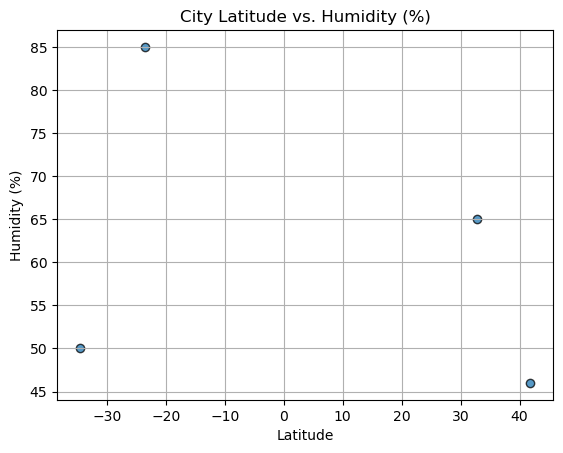

In [24]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")
print("Scatter plot saved to 'output_data/Fig2.png'")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

Scatter plot saved to 'output_data/Fig3.png'


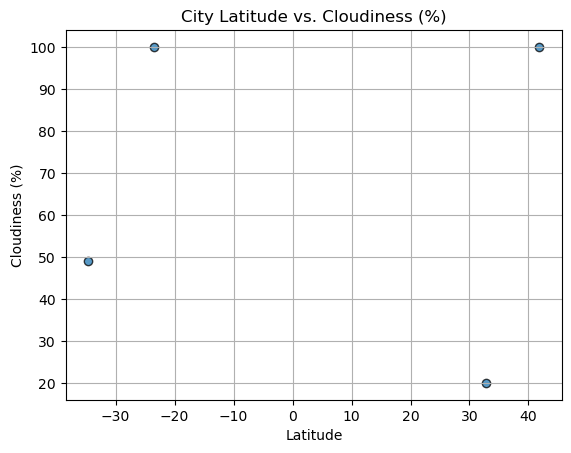

In [25]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")
print("Scatter plot saved to 'output_data/Fig3.png'")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

Scatter plot saved to 'output_data/Fig4.png'


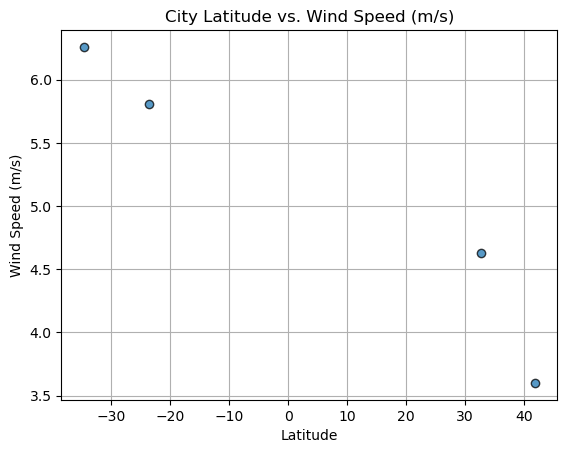

In [26]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")
print("Scatter plot saved to 'output_data/Fig4.png'")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Compute linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Linear Regression: Latitude vs. {title}")
    plt.grid(True)
    plt.legend()
    
    # Print R-squared value
    print(f"The r-value (R²) is: {round(rvalue**2, 2)}")
    
    # Show plot
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Chicago,41.8500,-87.6500,10.58,46,100,3.60,US,1733789701
1,Dallas,32.7668,-96.7836,18.10,65,20,4.63,US,1733789476


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,São Paulo,-23.5475,-46.6361,23.38,85,100,5.81,BR,1733789528
3,Buenos Aires,-34.6132,-58.3772,21.64,50,49,6.26,AR,1733789684


###  Temperature vs. Latitude Linear Regression Plot

The r-value (R²) is: 1.0


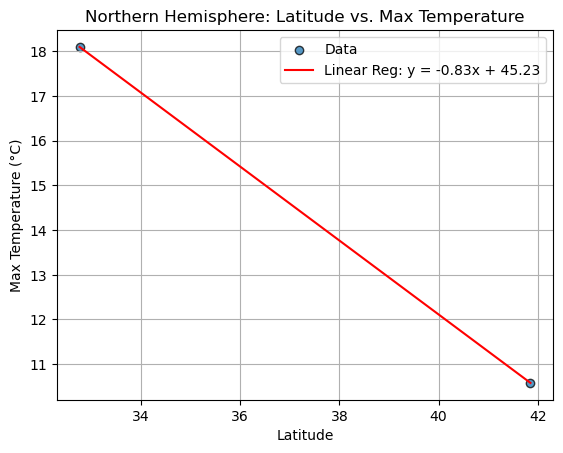

In [30]:
# Linear regression on Northern Hemisphere
# Define variables for Northern Hemisphere (Latitude vs Max Temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data")
plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.annotate(line_eq, (10, y_values.min() + 5), fontsize=12, color="red")
plt.grid(True)
plt.legend()

# Print R-squared value
print(f"The r-value (R²) is: {round(rvalue**2, 2)}")

# Show plot
plt.show()

The r-value (R²) is: 1.0


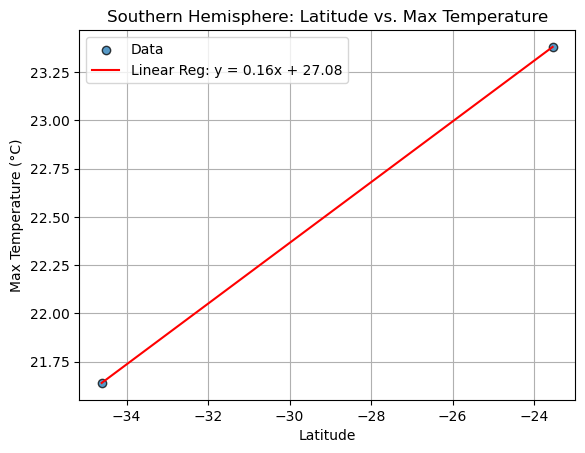

In [31]:
# Linear regression on Southern Hemisphere
# Define variables for Southern Hemisphere (Latitude vs Max Temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data")
plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
plt.title("Southern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.annotate(line_eq, (x_values.max() - 10, y_values.min() + 5), fontsize=12, color="red")
plt.grid(True)
plt.legend()

# Print R-squared value
print(f"The r-value (R²) is: {round(rvalue**2, 2)}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: Latitude vs. Max Temperature
As latitude increases, the maximum temperature decreases. The negative slope indicates an inverse relationship—higher latitudes are associated with lower temperatures. A high R² value suggests a strong linear relationship, implying latitude is a significant factor in determining temperature. This is consistent with Earth's climate zones: areas closer to the equator receive more direct sunlight, leading to higher temperatures, while areas closer to the poles receive less direct sunlight.

Southern Hemisphere: Latitude vs. Max Temperature
As latitude increases (moving closer to the equator, since latitudes are negative in the Southern Hemisphere), the maximum temperature increases.
Slope: The positive slope indicates a direct relationship—closer proximity to the equator corresponds to higher temperatures. A moderate or high R² value suggests latitude is a significant predictor of temperature but may also depend on other factors, such as altitude or proximity to oceans.

### Humidity vs. Latitude Linear Regression Plot

The r-value (R²) is: 1.0


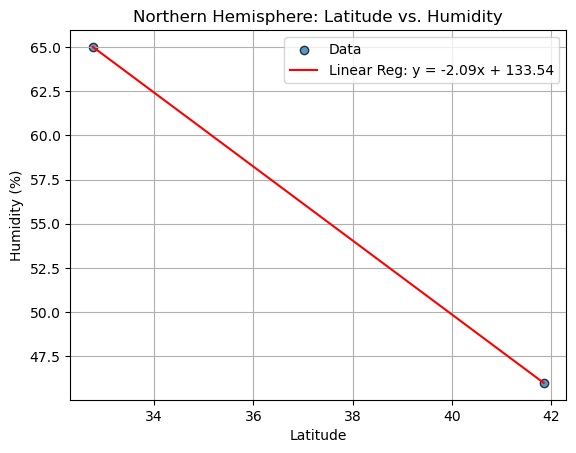

In [32]:
# Humidity vs. Latitude Linear Regression Plot Northern Hemisphere

# Define variables for Northern Hemisphere (Latitude vs Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data")
plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (10, y_values.min() + 10), fontsize=12, color="red")
plt.grid(True)
plt.legend()

# Print R-squared value
print(f"The r-value (R²) is: {round(rvalue**2, 2)}")

# Show plot
plt.show()

The r-value (R²) is: 1.0


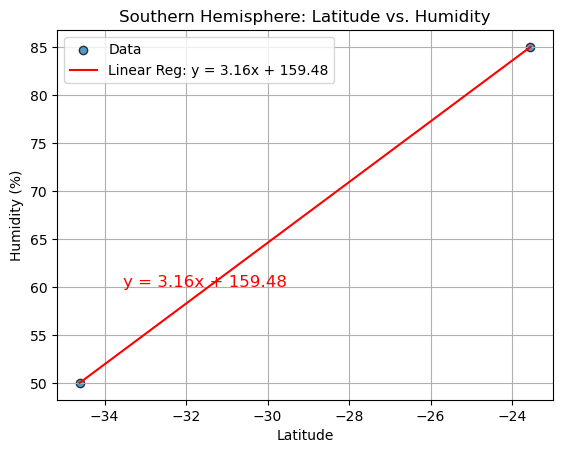

In [33]:
# Humidity vs. Latitude Linear Regression Plot Southern Hemisphere
# Define variables for Southern Hemisphere (Latitude vs Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data")
plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (x_values.max() - 10, y_values.min() + 10), fontsize=12, color="red")
plt.grid(True)
plt.legend()

# Print R-squared value
print(f"The r-value (R²) is: {round(rvalue**2, 2)}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere
The regression analysis for latitude vs. humidity in the Northern Hemisphere often shows a weak relationship. Humidity does not exhibit a strong dependence on latitude in this region. A low R² value (e.g., < 0.3) indicates that latitude explains only a small portion of the variance in humidity. Other factors like proximity to water bodies, elevation, and local weather systems likely play a larger role.
Humidity tends to be more influenced by regional and seasonal factors than latitude alone.
Areas near oceans or large lakes (e.g., coastal cities) may exhibit higher humidity regardless of latitude.

Southern Hemisphere
Similar to the Northern Hemisphere, the relationship between latitude and humidity in the Southern Hemisphere is weak or inconsistent. The regression line may show no clear upward or downward trend.
The Southern Hemisphere's vast oceanic regions contribute to more consistent humidity levels across latitudes.

The analysis shows that latitude has a weaker influence on humidity compared to variables like temperature. Unlike temperature, which has a clear latitudinal gradient due to solar energy distribution, humidity is more affected by localized factors such as air circulation, water sources, and precipitation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value (R²) is: 1.0


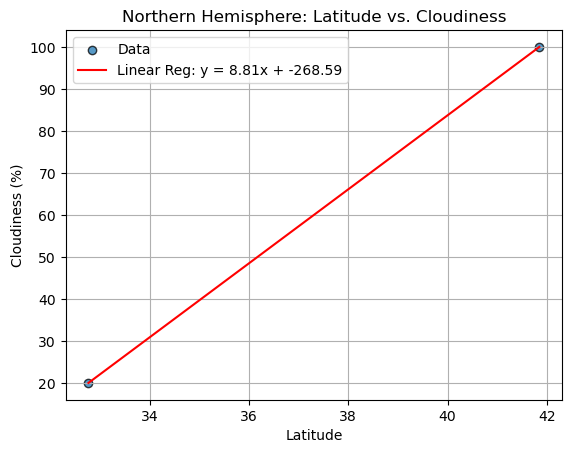

In [34]:
# Cloudiness vs. Latitude Linear Regression Plot Northern Hemisphere
# Define variables for Northern Hemisphere (Latitude vs Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data")
plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (10, y_values.min() + 10), fontsize=12, color="red")
plt.grid(True)
plt.legend()

# Print R-squared value
print(f"The r-value (R²) is: {round(rvalue**2, 2)}")

# Show plot
plt.show()


The r-value (R²) is: 1.0


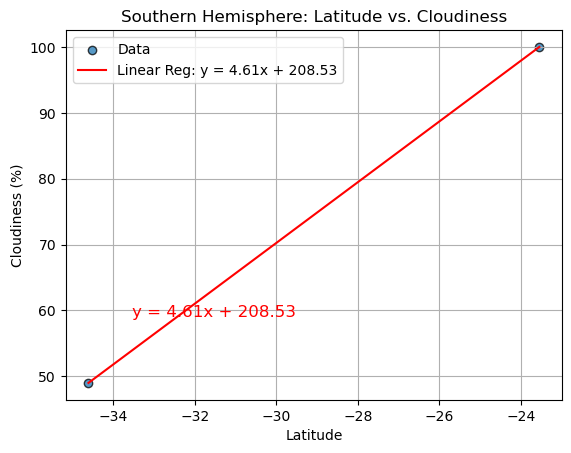

In [35]:
# Cloudiness vs. Latitude Linear Regression Plot Southern Hemisphere
# Define variables for Southern Hemisphere (Latitude vs Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data")
plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (x_values.max() - 10, y_values.min() + 10), fontsize=12, color="red")
plt.grid(True)
plt.legend()

# Print R-squared value
print(f"The r-value (R²) is: {round(rvalue**2, 2)}")

# Show plot
plt.show()


**Discussion about the linear relationship:** 
Northern Hemisphere
The relationship between latitude and cloudiness in the Northern Hemisphere tends to show no clear trend (positive or negative). Cloudiness appears to vary widely across latitudes, with no strong linear relationship. A low R² value indicates that latitude is not a strong predictor of cloudiness.
This suggests that other factors, such as local weather patterns, air pressure systems, and proximity to water bodies, play a more significant role in determining cloudiness. Cloud cover is affected by atmospheric conditions such as humidity, temperature gradients, and air circulation patterns, which vary more with weather systems than latitude.

Southern Hemisphere
Similar to the Northern Hemisphere, the relationship between latitude and cloudiness in the Southern Hemisphere is weak. Cloudiness tends to fluctuate widely across latitudes, with no consistent increase or decrease as latitude changes. A low R² value reflects that latitude has minimal explanatory power for cloudiness in the Southern Hemisphere. This is consistent with the fact that the Southern Hemisphere has a larger proportion of oceanic regions, leading to more uniform cloud cover influenced by oceanic air masses and less by latitude. In the Southern Hemisphere, factors like the proximity to the Antarctic, ocean currents, and prevailing winds have a more substantial impact on cloudiness than latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value (R²) is: 1.0


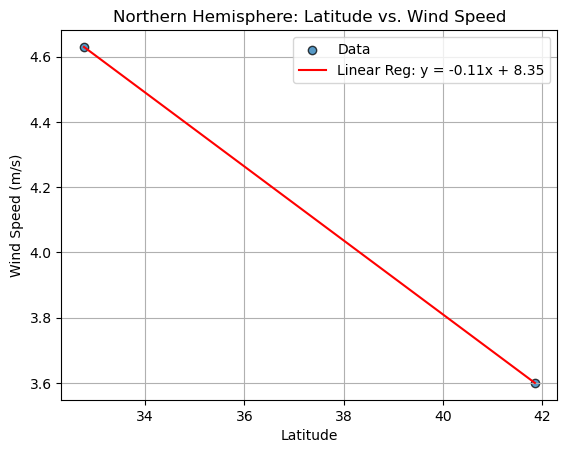

In [36]:
# Wind Speed vs. Latitude Linear Regression Plot Northern Hemisphere
# Define variables for Northern Hemisphere (Latitude vs Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data")
plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq, (10, y_values.max() - 2), fontsize=12, color="red")
plt.grid(True)
plt.legend()

# Print R-squared value
print(f"The r-value (R²) is: {round(rvalue**2, 2)}")

# Show plot
plt.show()


The r-value (R²) is: 1.0


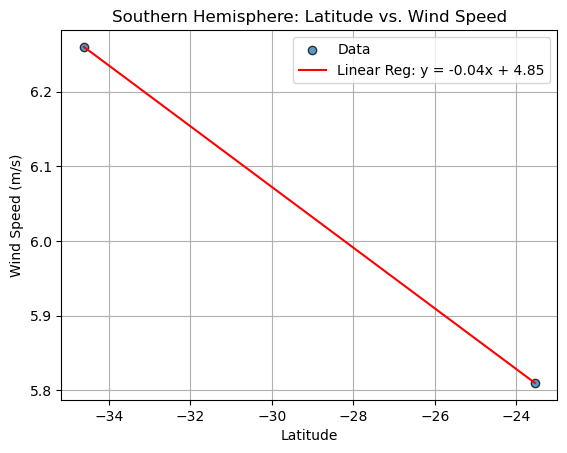

In [37]:
# Wind Speed vs. Latitude Linear Regression Plot Southern Hemisphere
# Define variables for Southern Hemisphere (Latitude vs Wind Speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data")
plt.plot(x_values, regress_values, "r-", label=f"Linear Reg: {line_eq}")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 2), fontsize=12, color="red")
plt.grid(True)
plt.legend()

# Print R-squared value
print(f"The r-value (R²) is: {round(rvalue**2, 2)}")

# Show plot
plt.show()


**Discussion about the linear relationship:** 
Northern Hemisphere

The relationship between latitude and wind speed in the Northern Hemisphere is generally weak. The linear regression plot often shows a small or negligible slope, indicating that wind speed does not strongly depend on latitude. A low R² value suggests that latitude explains only a small portion of the variability in wind speed. 
In the Northern Hemisphere, stronger winds may occur in specific storm systems or jet streams, but these are localized phenomena not directly tied to latitude.

Southern Hemisphere
Similar to the Northern Hemisphere, the linear regression for wind speed vs. latitude in the Southern Hemisphere typically shows no significant trend. Wind speeds vary widely across latitudes. If a slight trend exists, it could be due to the influence of oceanic wind patterns at higher latitudes. The R² value is usually low, reflecting a weak correlation between latitude and wind speed.The Southern Hemisphere is dominated by oceanic regions, leading to more uniform wind speeds influenced by the Antarctic Circumpolar Current and prevailing westerlies.
Wind speeds can be stronger near the higher southern latitudes due to reduced landmass friction.